# Small thickness : Scheludko renormalisation

When four or fewer peaks are detected, the Scheludko renormalization method becomes effective. Since this method relies on the inverse function of the reflected intensity as a function of wavelength between two consecutive interference orders $m$, we distinguish between two cases : one with a non-zero interference order, and one with zero interference order.

## Case 1 : Non-zero interference order $m$

### Step 1 : Identifying peak wavelength

Assuming the previous procedure has been followed and the resulting peak plot is as follows :

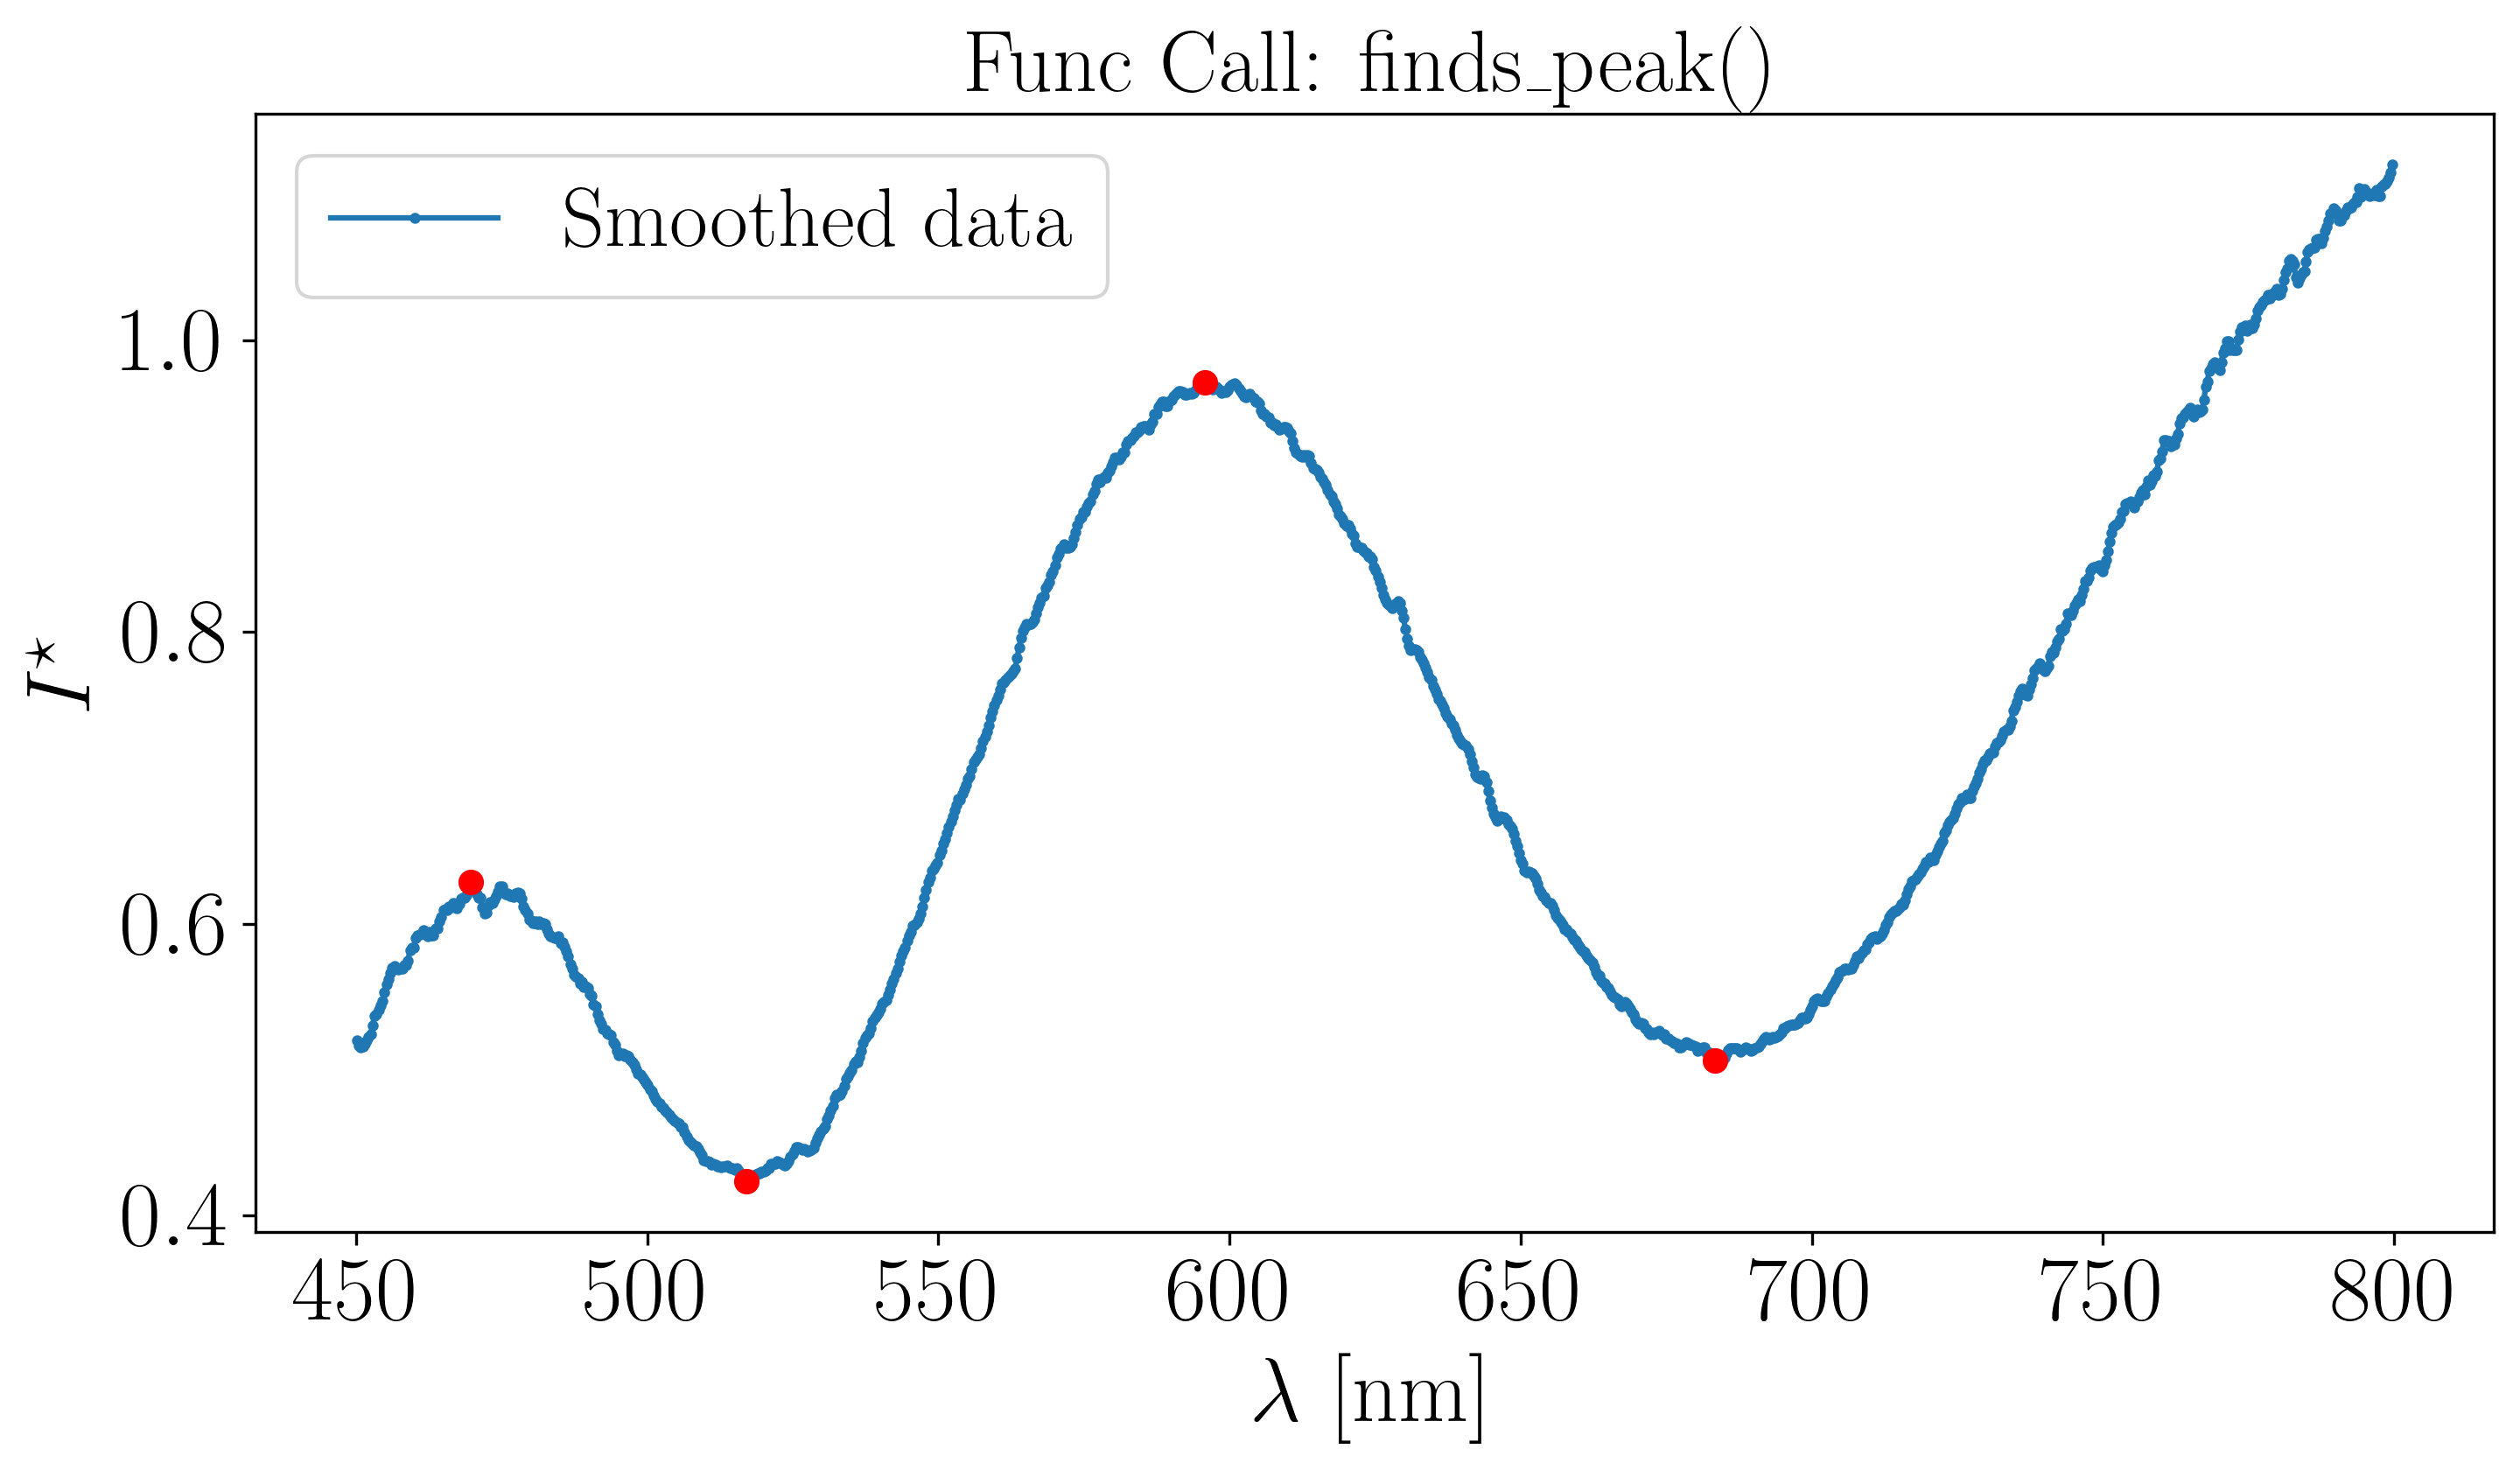

In [1]:
from pathlib import Path
from optifik.io import load_spectrum
from optifik.analysis import plot_spectrum
from optifik.analysis import smooth_intensities
from optifik.analysis import finds_peak

# Define the path to the folder containing your .xy file
datafile_path = datafile_path = Path('../../data/basic/000005253.xy')

# Load wavelengths and intensities from the file
wavelengths, intensities = load_spectrum(datafile_path, 
                                         wavelength_min=450, 
                                         wavelength_max=800)

# Smoothing the intensity
intensities_smoothed = smooth_intensities(intensities)

# Peak detection function, min_peak_prominence and min_peak_distance can be adjusted.
peaks_min, peaks_max = finds_peak(wavelengths, intensities_smoothed, 
                                   min_peak_prominence=0.02, 
                                   min_peak_distance=10, 
                                   plot=True)

In the $[450, 800]$ nm spectral range shown above, four peaks have been successfully detected, indicating that they correspond to non-zero interference orders. To apply the Scheludko renormalization method between the rightmost peaks, we first extract their wavelength. This is done using the `get_default_start_stop_wavelengths` function from the `optifik.scheludko` module. 

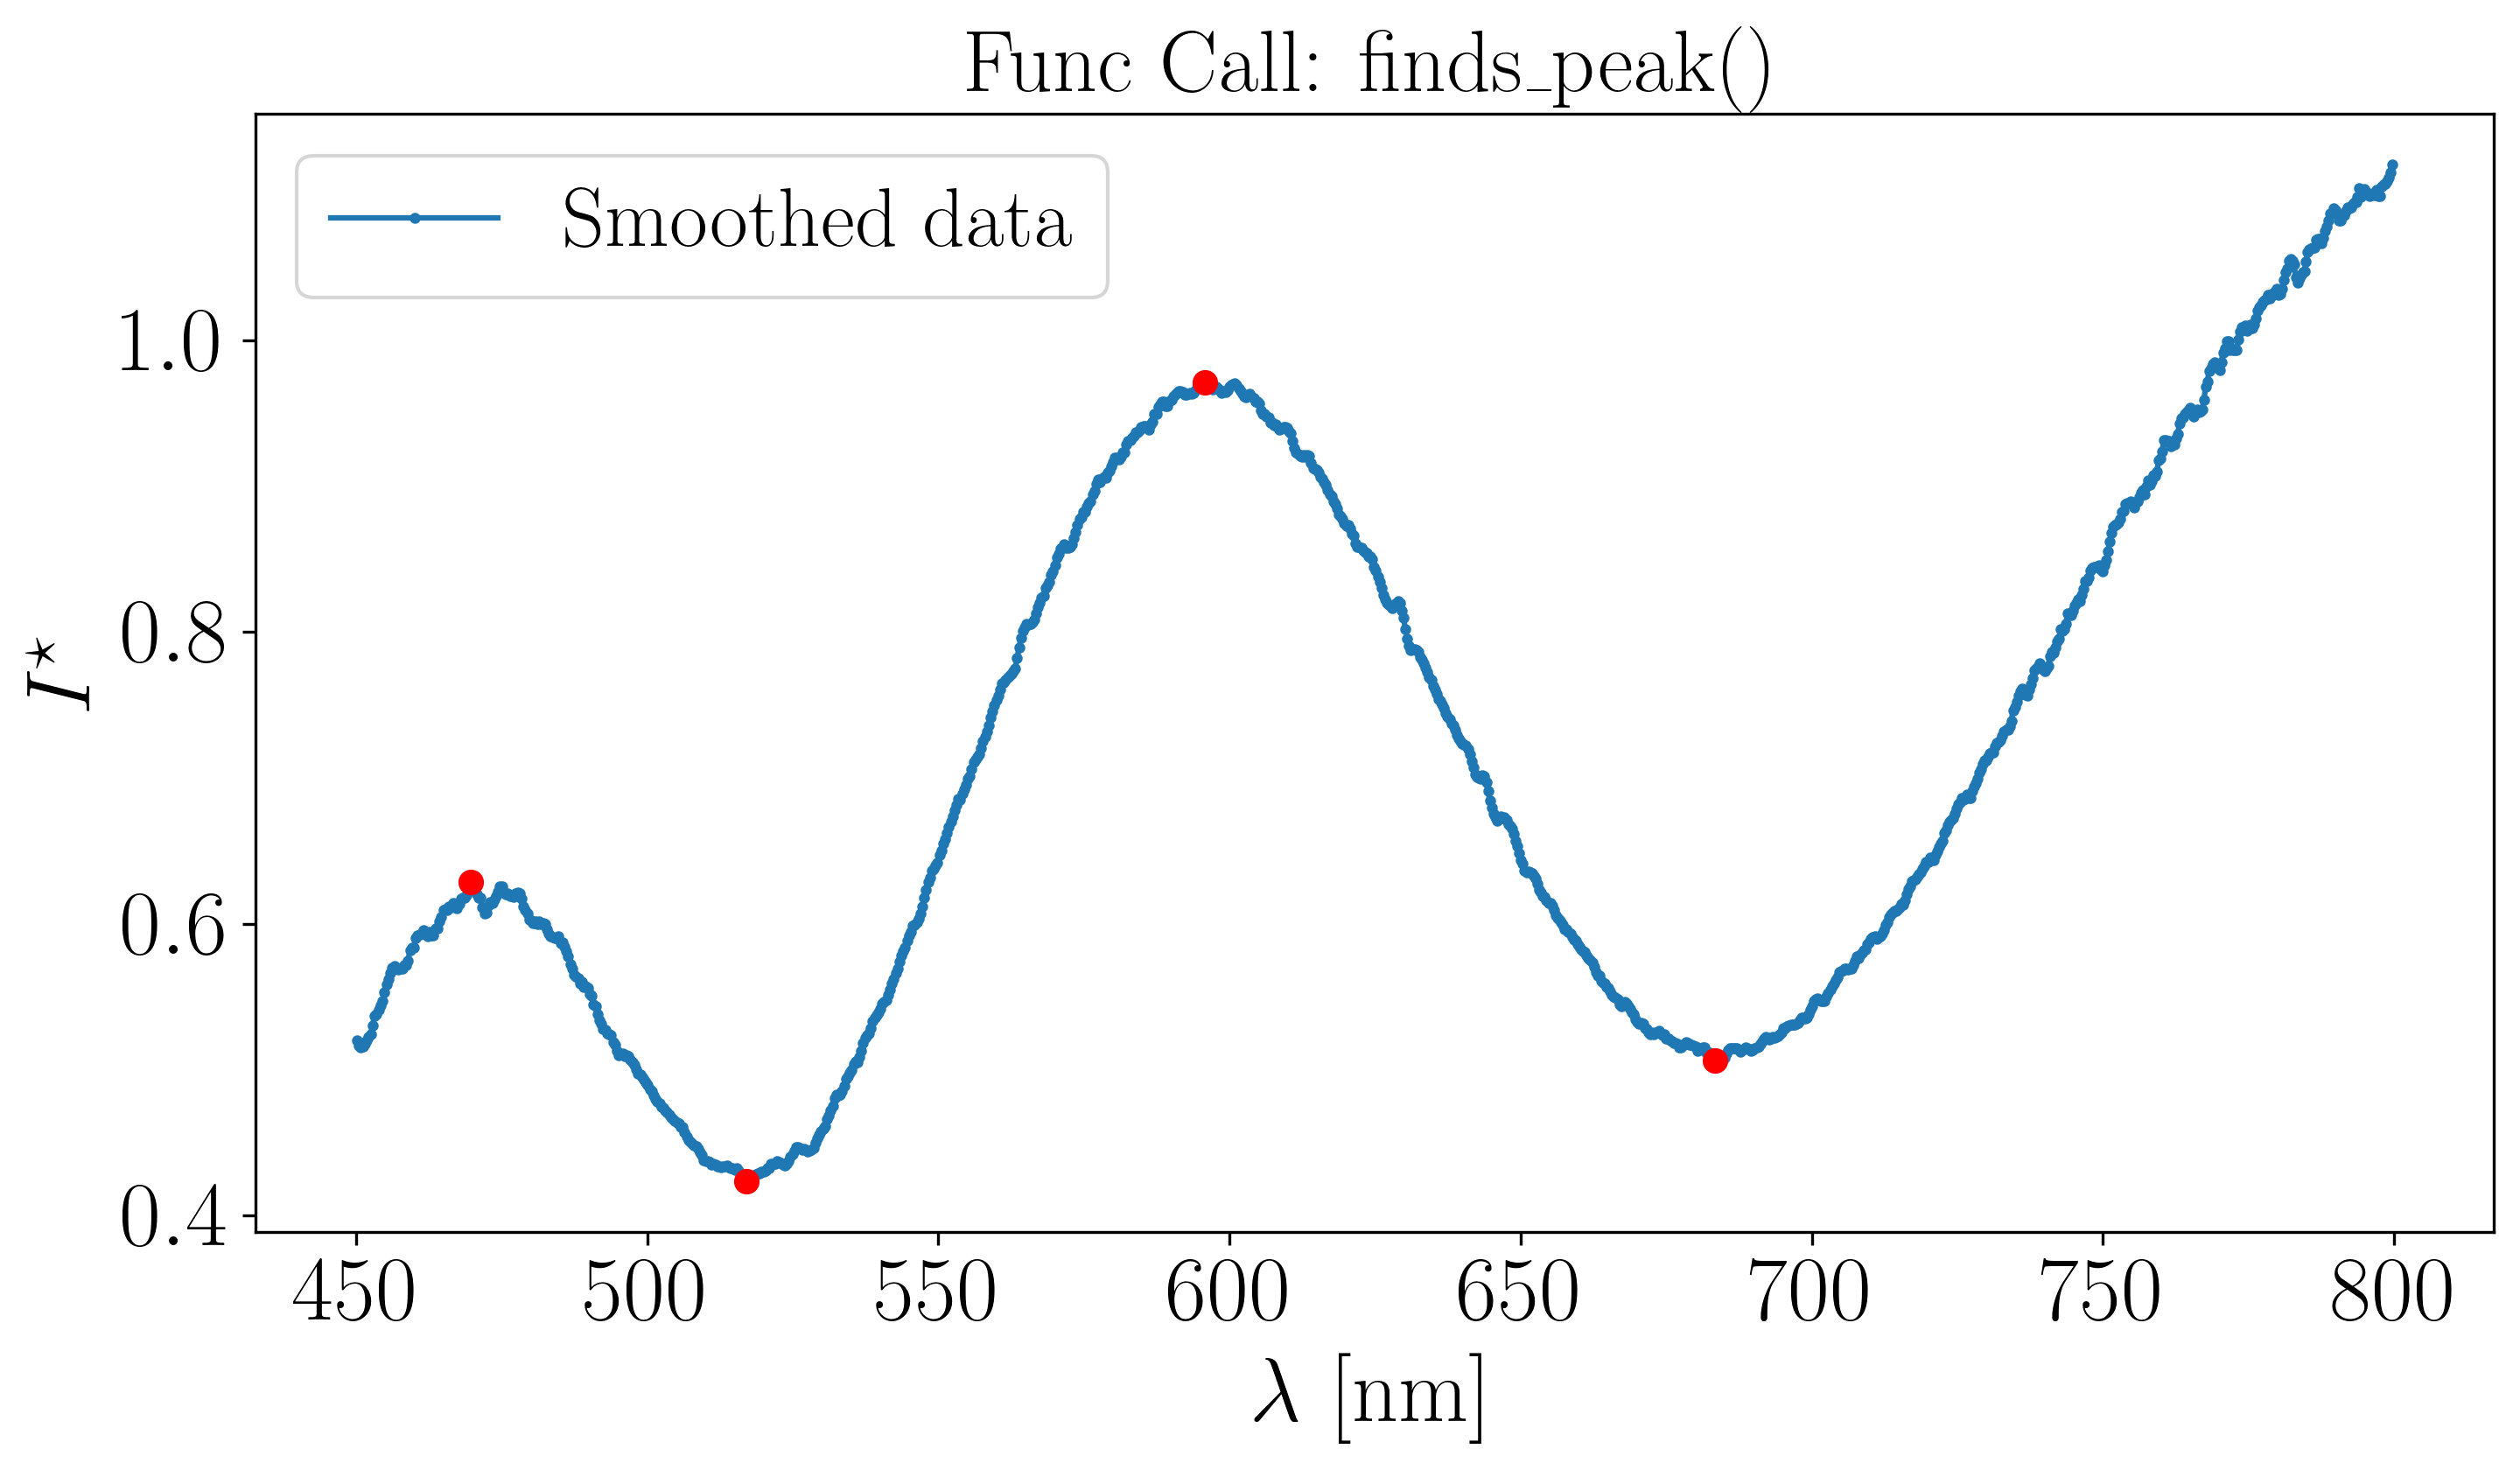

In [2]:
from optifik.scheludko import get_default_start_stop_wavelengths
# Extract the wavelength corresponding to the peak at the end of the rightmost monotonic branch
start, stop = get_default_start_stop_wavelengths(wavelengths, intensities_smoothed, 
                                               refractive_index=1.33, 
                                               min_peak_prominence=0.02, 
                                               plot=True)

The console output shows the wavelength corresponding to the peak at the end of the rightmost monotonic branch, which are 595.8 nm and 683.4 nm in this example

- The example correponds to the file `000005253.xy`, located in the `..\tests\basic` folder
- You can specify the medium's refractive index and the peak prominence using the `refractive_index` and `min_peak_prominence` parameters, respectively.
- You can also provide a refractive index function $n(\lambda)$ as an `refractive_index` input.

### Step 2 : Determine film thickness

To derive the film thickness $h$, we use the `thickness_from_scheludko` function from the `optifik.scheludko` module. Here an exemple of plots you can obtain.

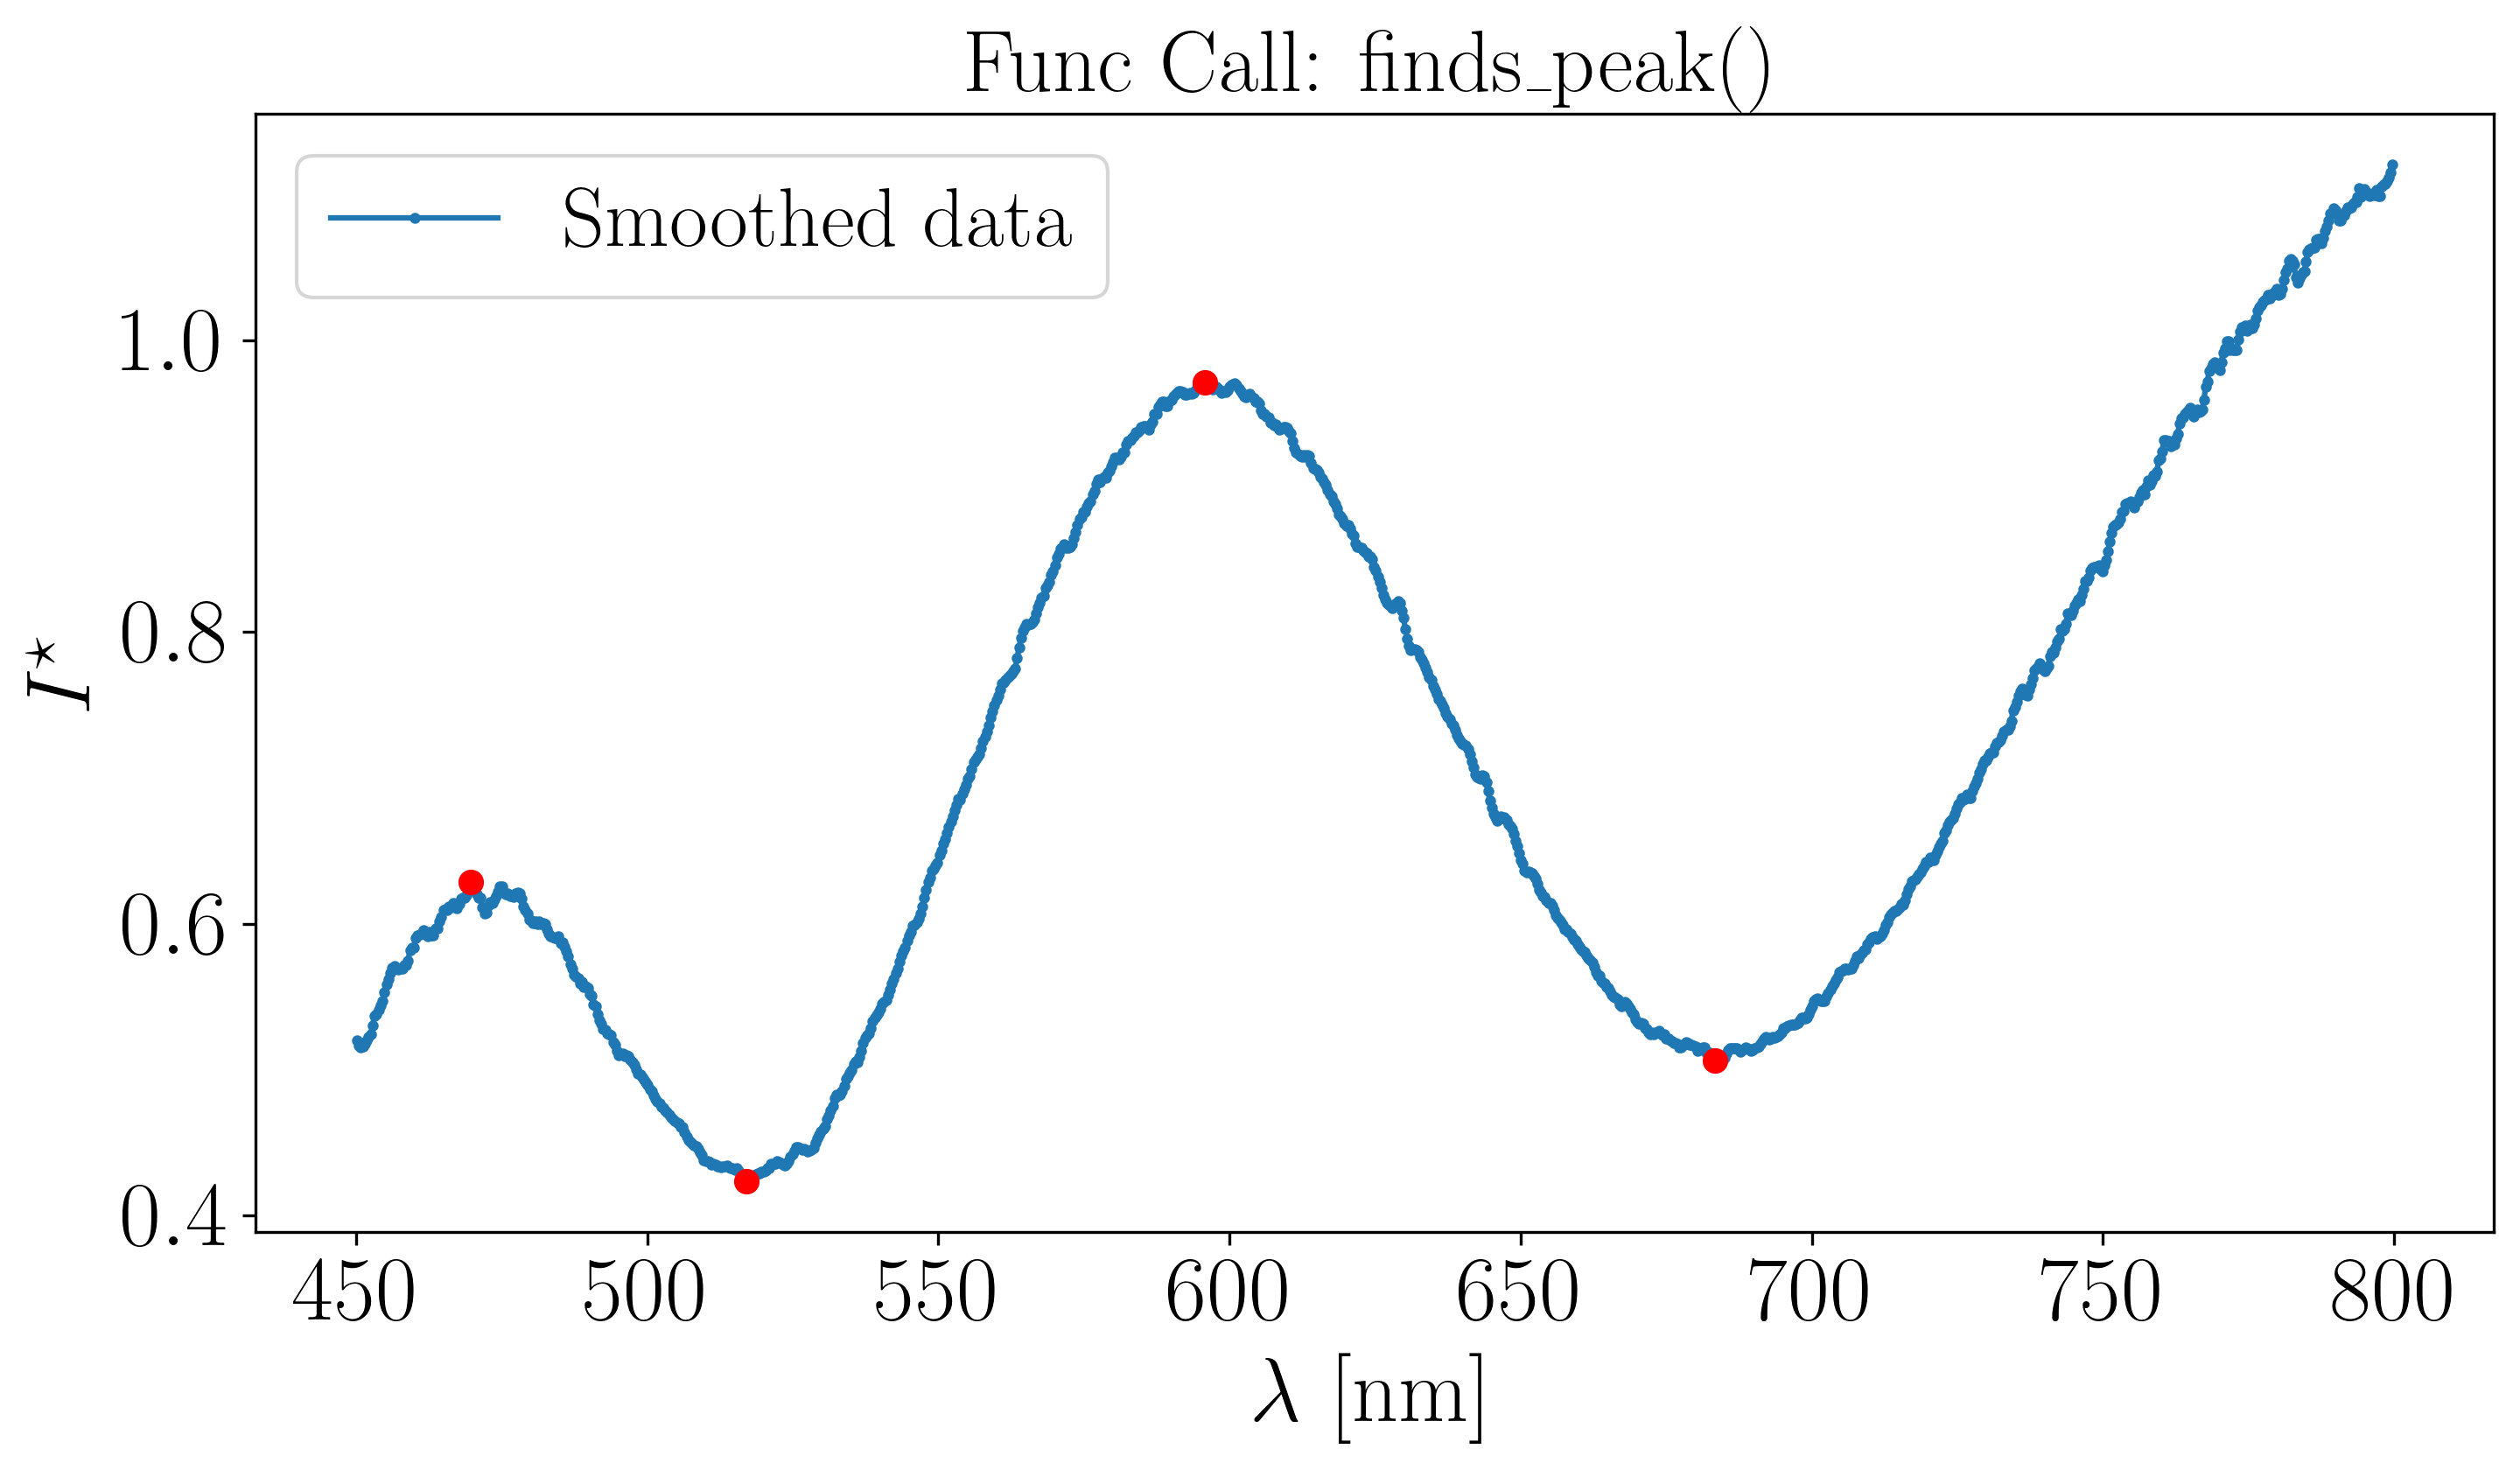

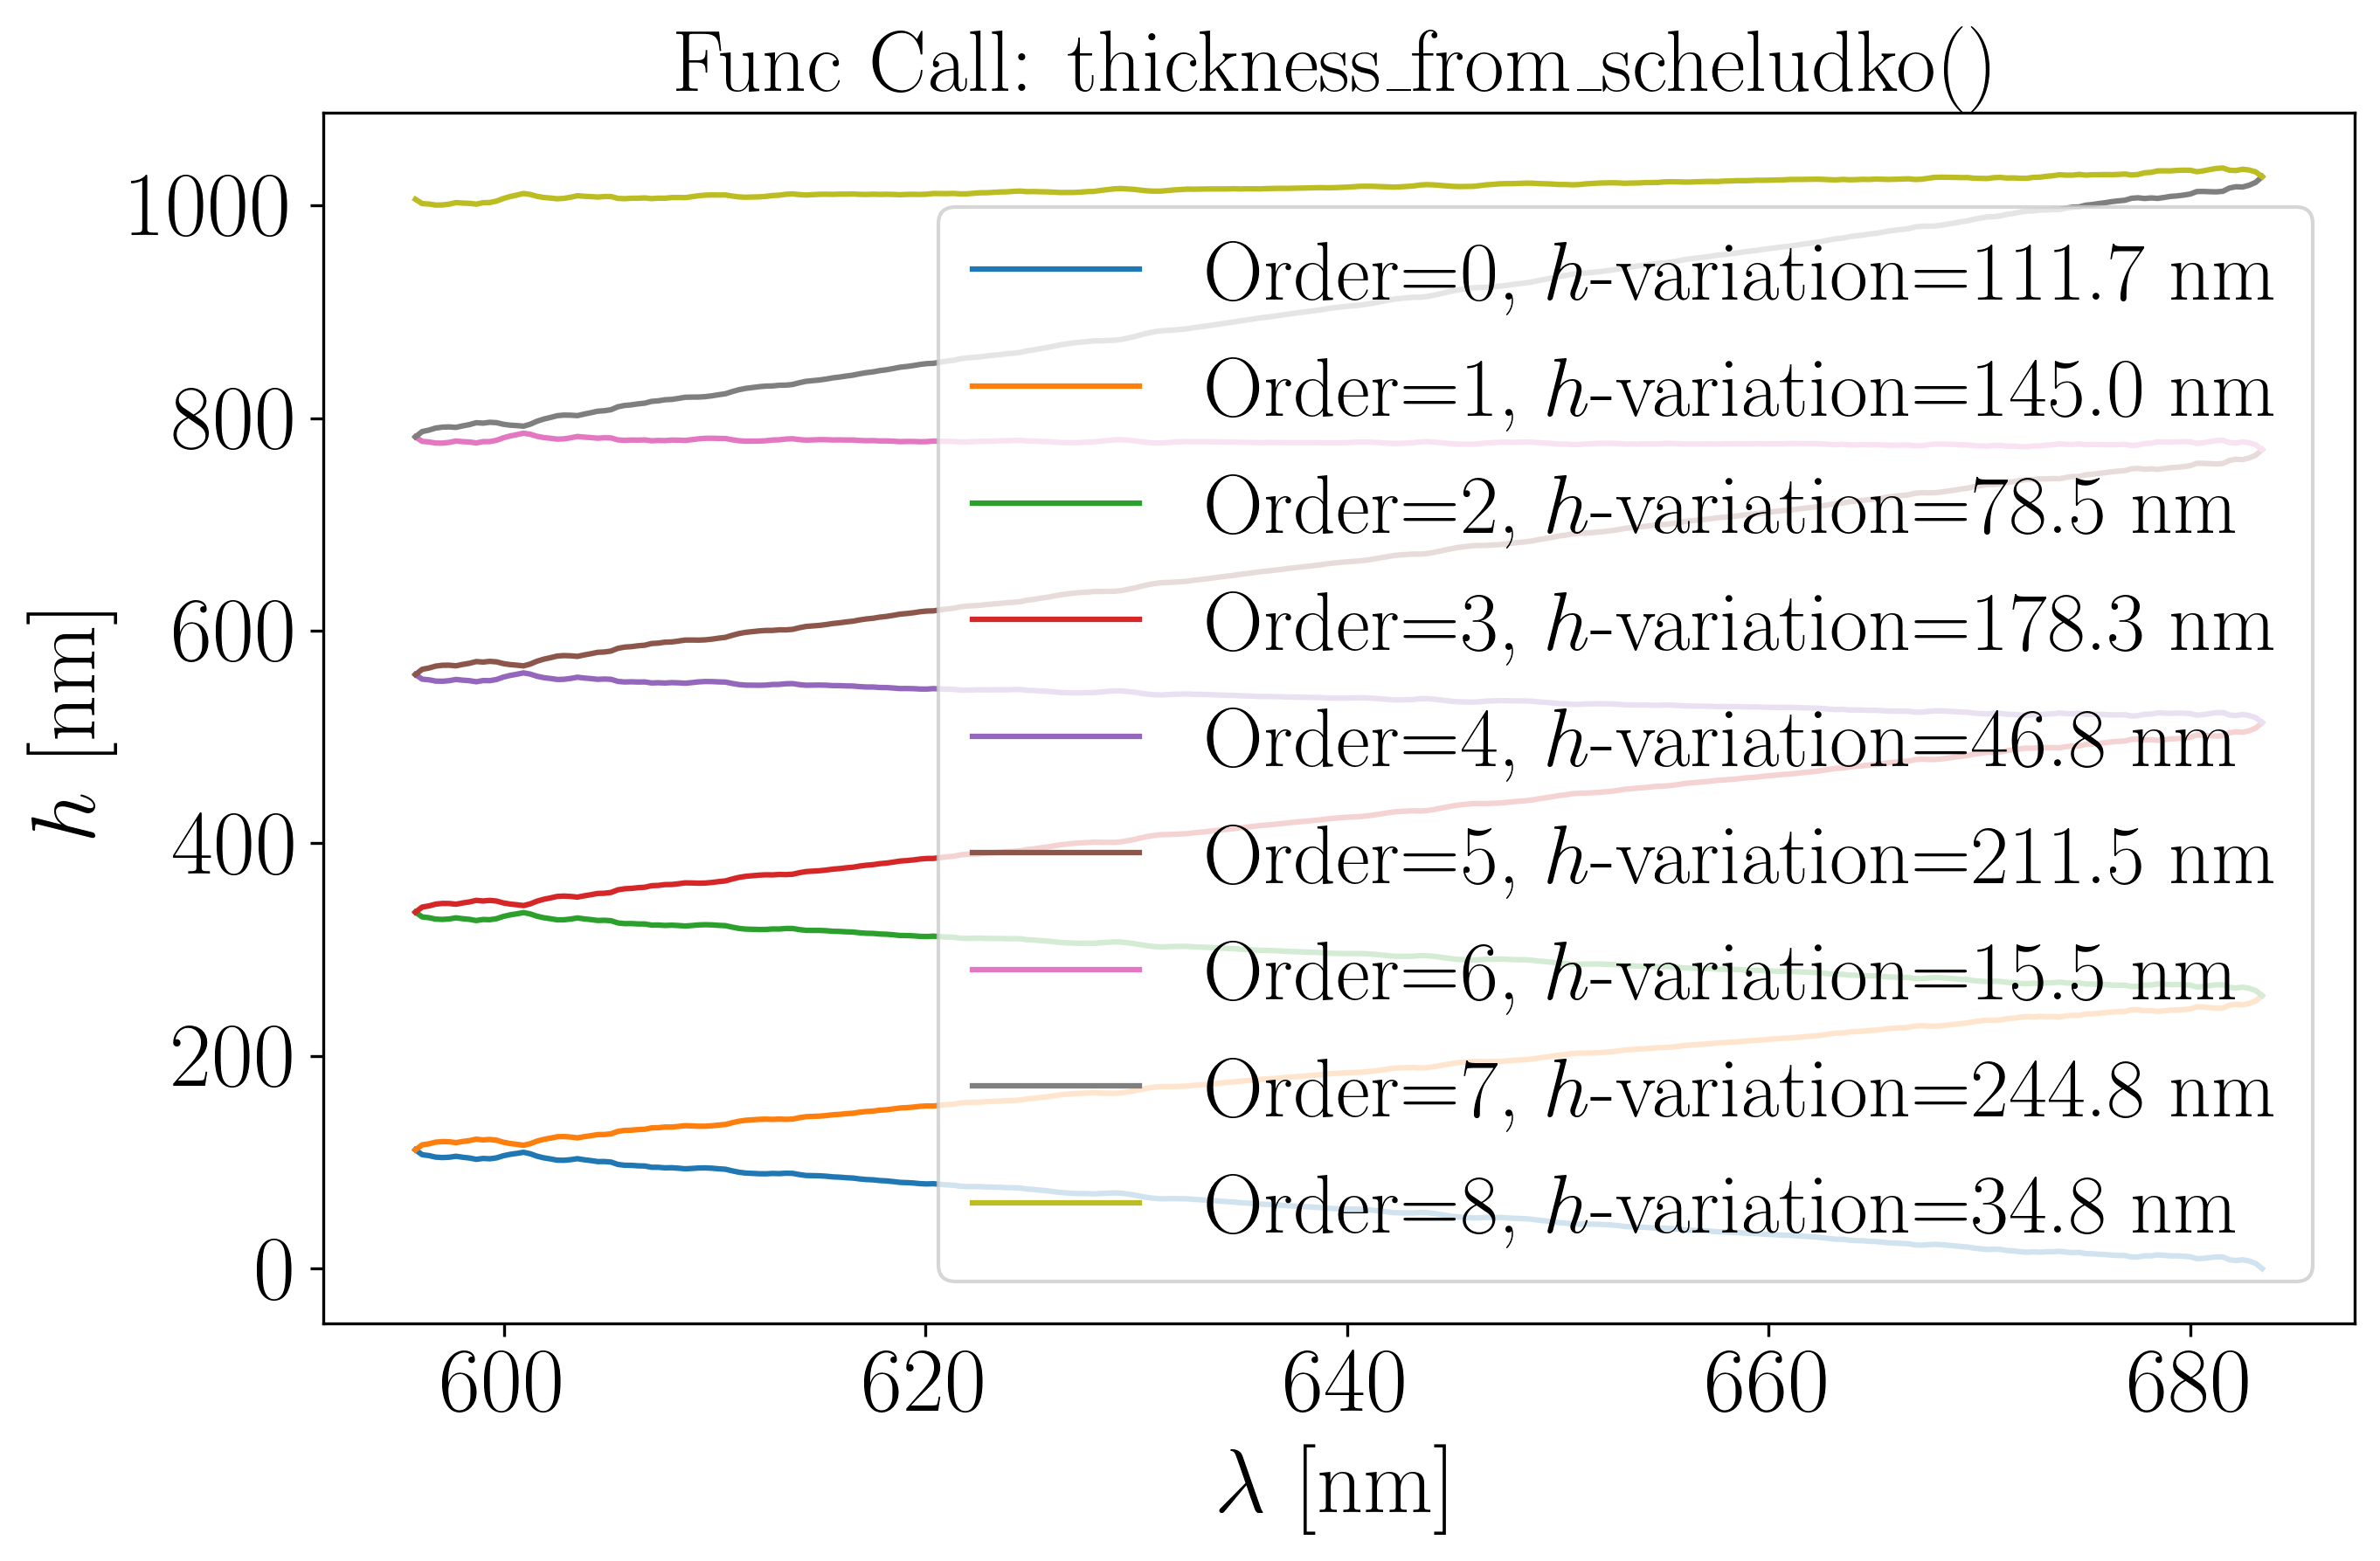

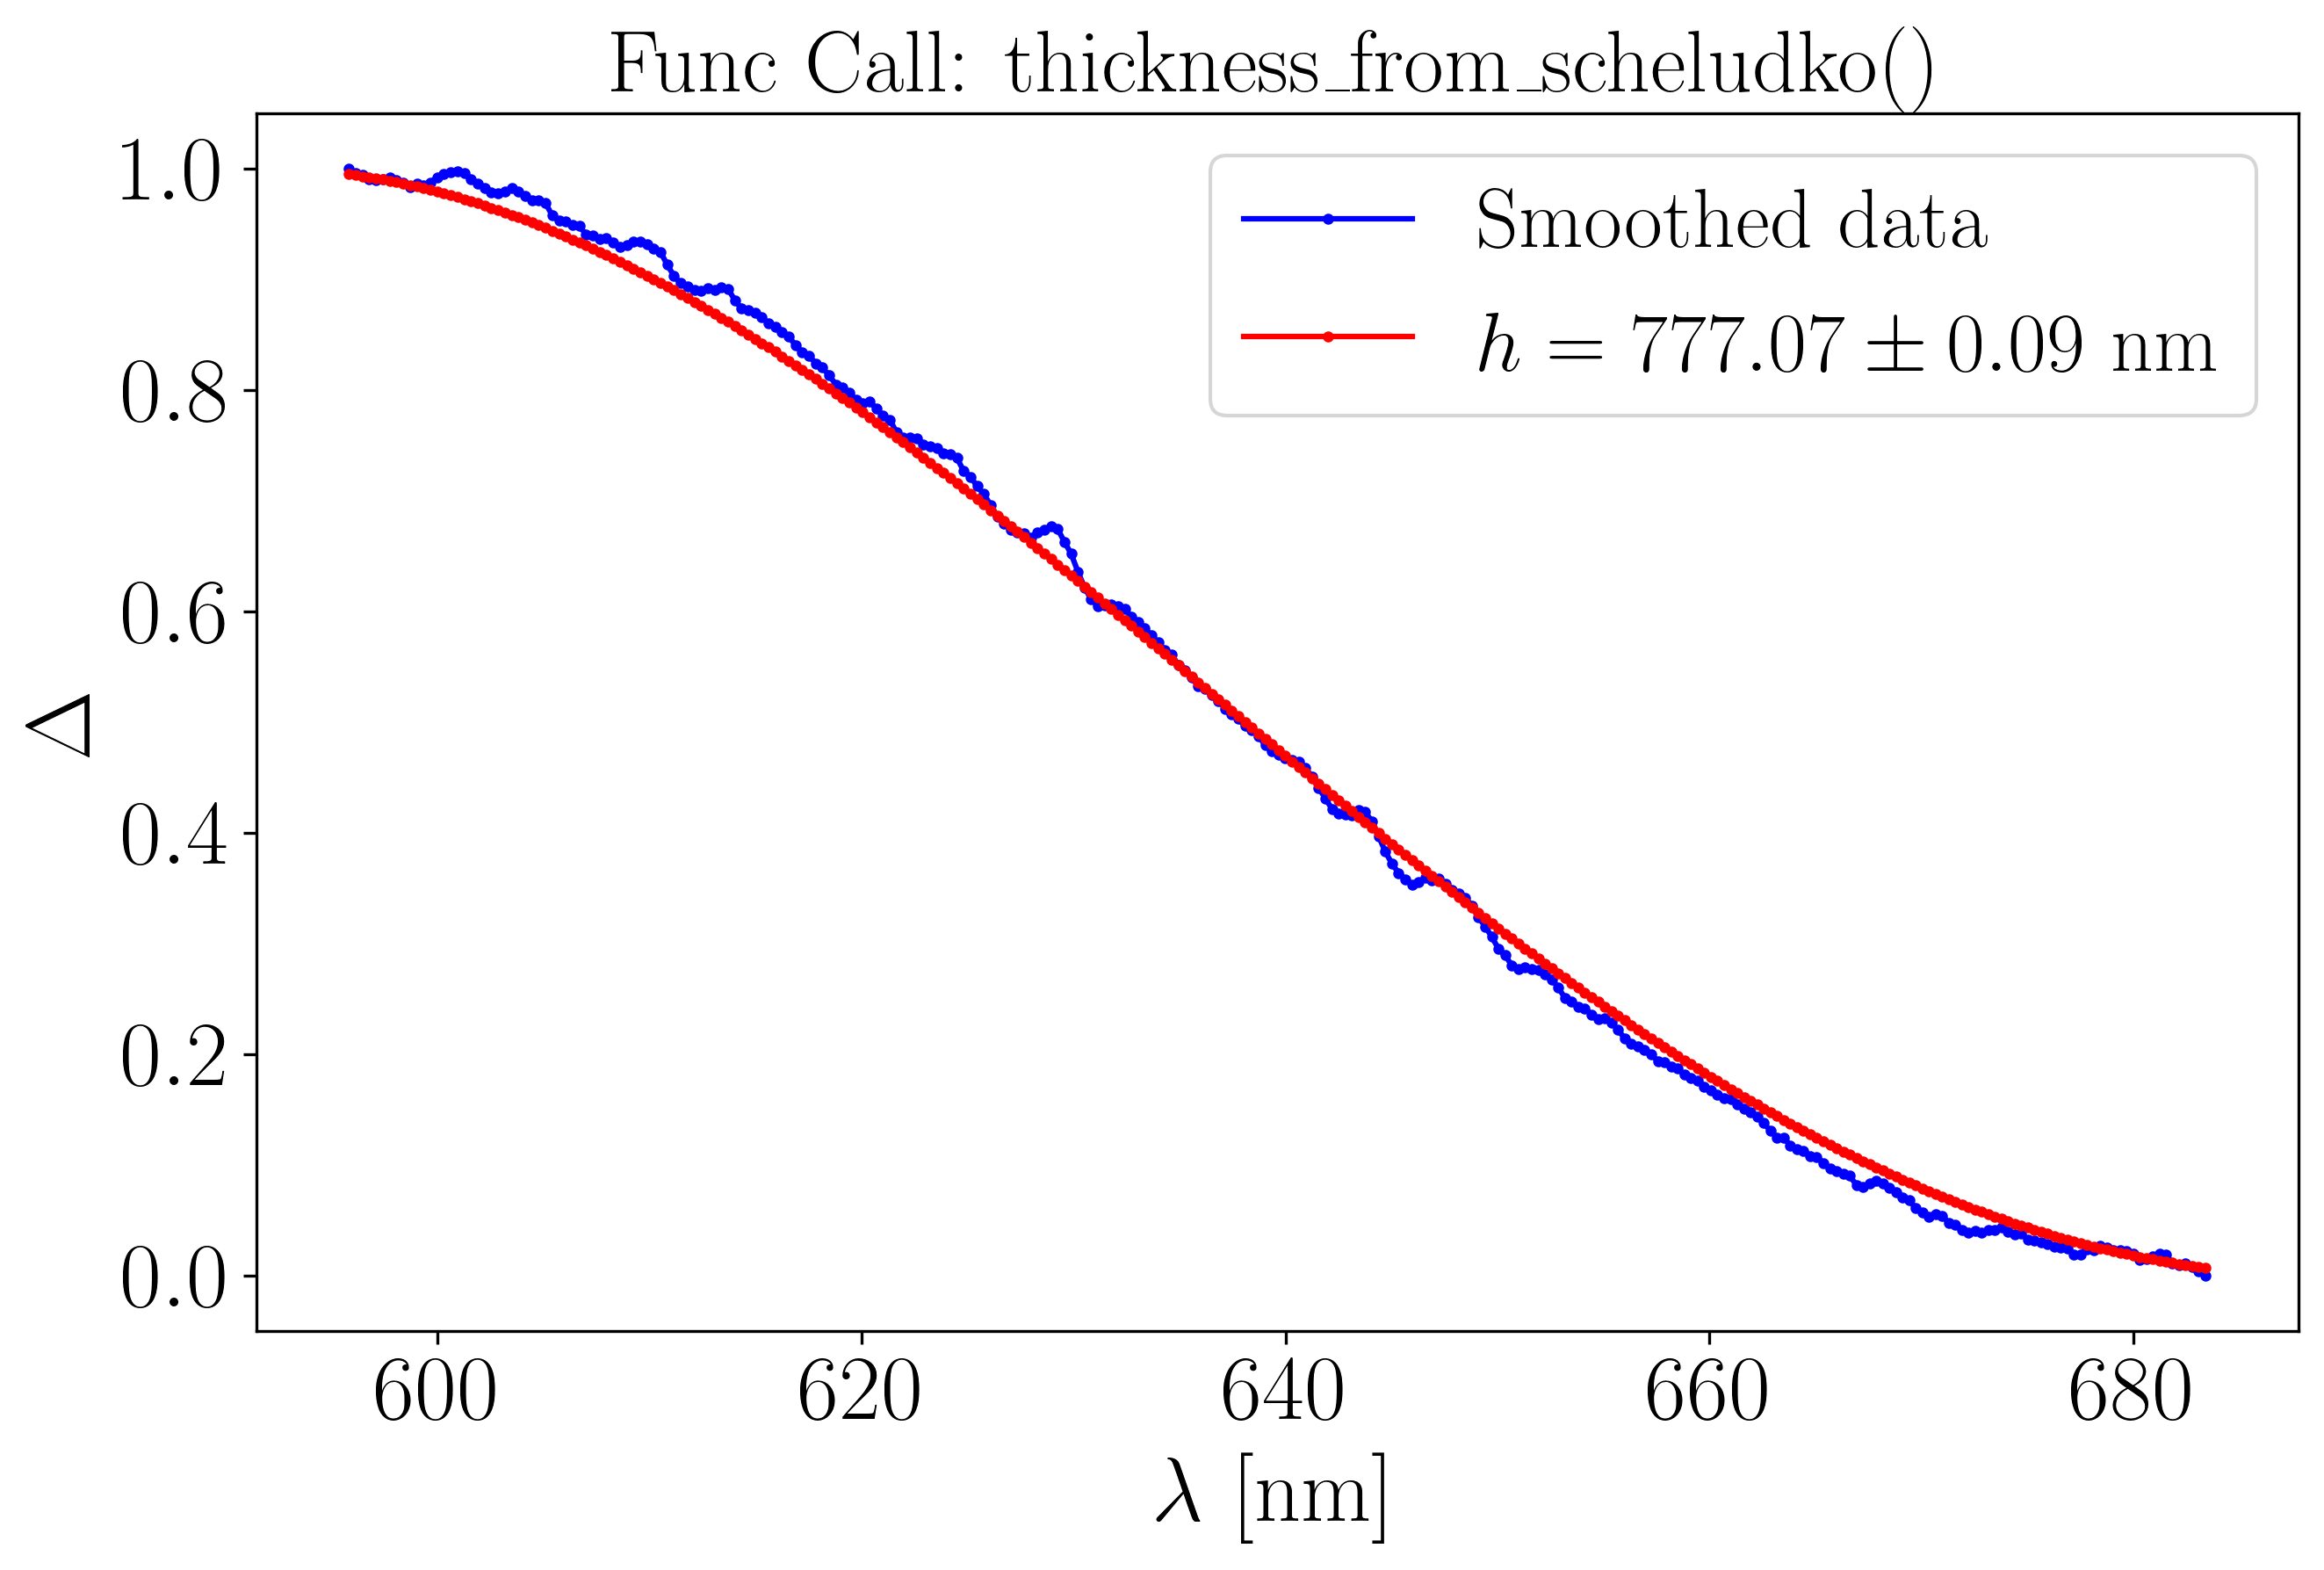

In [3]:
from optifik.scheludko import thickness_from_scheludko

# Extract the wavelength corresponding to the peak at the end of the rightmost monotonic branch
wavelength_min, wavelength_max = get_default_start_stop_wavelengths(wavelengths, 
                                                                    intensities_smoothed, 
                                                                    refractive_index= 1.33,
                                                                    min_peak_prominence=0.019, 
                                                                    plot=True)

# Refractive index calculated using Cauchy's law
refractive_index = 1.324188 + 3102.060378 / (wavelengths**2)

# Determine the film thickness by Sheludko renormalisation
result = thickness_from_scheludko(wavelengths,
                                 intensities_smoothed,
                                 refractive_index=refractive_index,
                                 wavelength_start=wavelength_min,
                                 wavelength_stop=wavelength_max,
                                 interference_order=None,
                                 intensities_void=None,
                                 plot=True)

The first plot shows the Scheludko thickness computation at each wavelength $\lambda$ along the rightmost monotonic branch (see Step 1), for all interference orders between 0 and 12. The code automatically determines the correct interference order $m$ and calculates the corresponding film thickness $h$. The second plot fit the data with $h$ as an initial guess.

The console output shows the maximum thickness difference for every interfererence order $m$ from 0 to 12 with the smallest difference indicating the correct order, here $m=6$. It also provides the film thickness along with its associated uncertainty, here $h=778$ nm.

- You can provide a refractive index constant $n(\lambda) = n$ as an `refractive_index` input. Note that in this example a wavelength-dependent model such as Cauchy's law $\left(n(\lambda) = A + \frac{B}{\lambda^2}\right)$ is used.
- It is **mandatory** to give `wavelength_start` and `wavelength_stop`.
- You can specify manually `wavelength_start` and `wavelength_stop`parameters but, **be careful** - this may lead to incorrect results
- You can specify manually any interferencer order using the `interferencer order`parameter.

## Case 2 : zero interference order $m$

Assuming the previous procedure has been followed and the resulting peak plot is as follows :

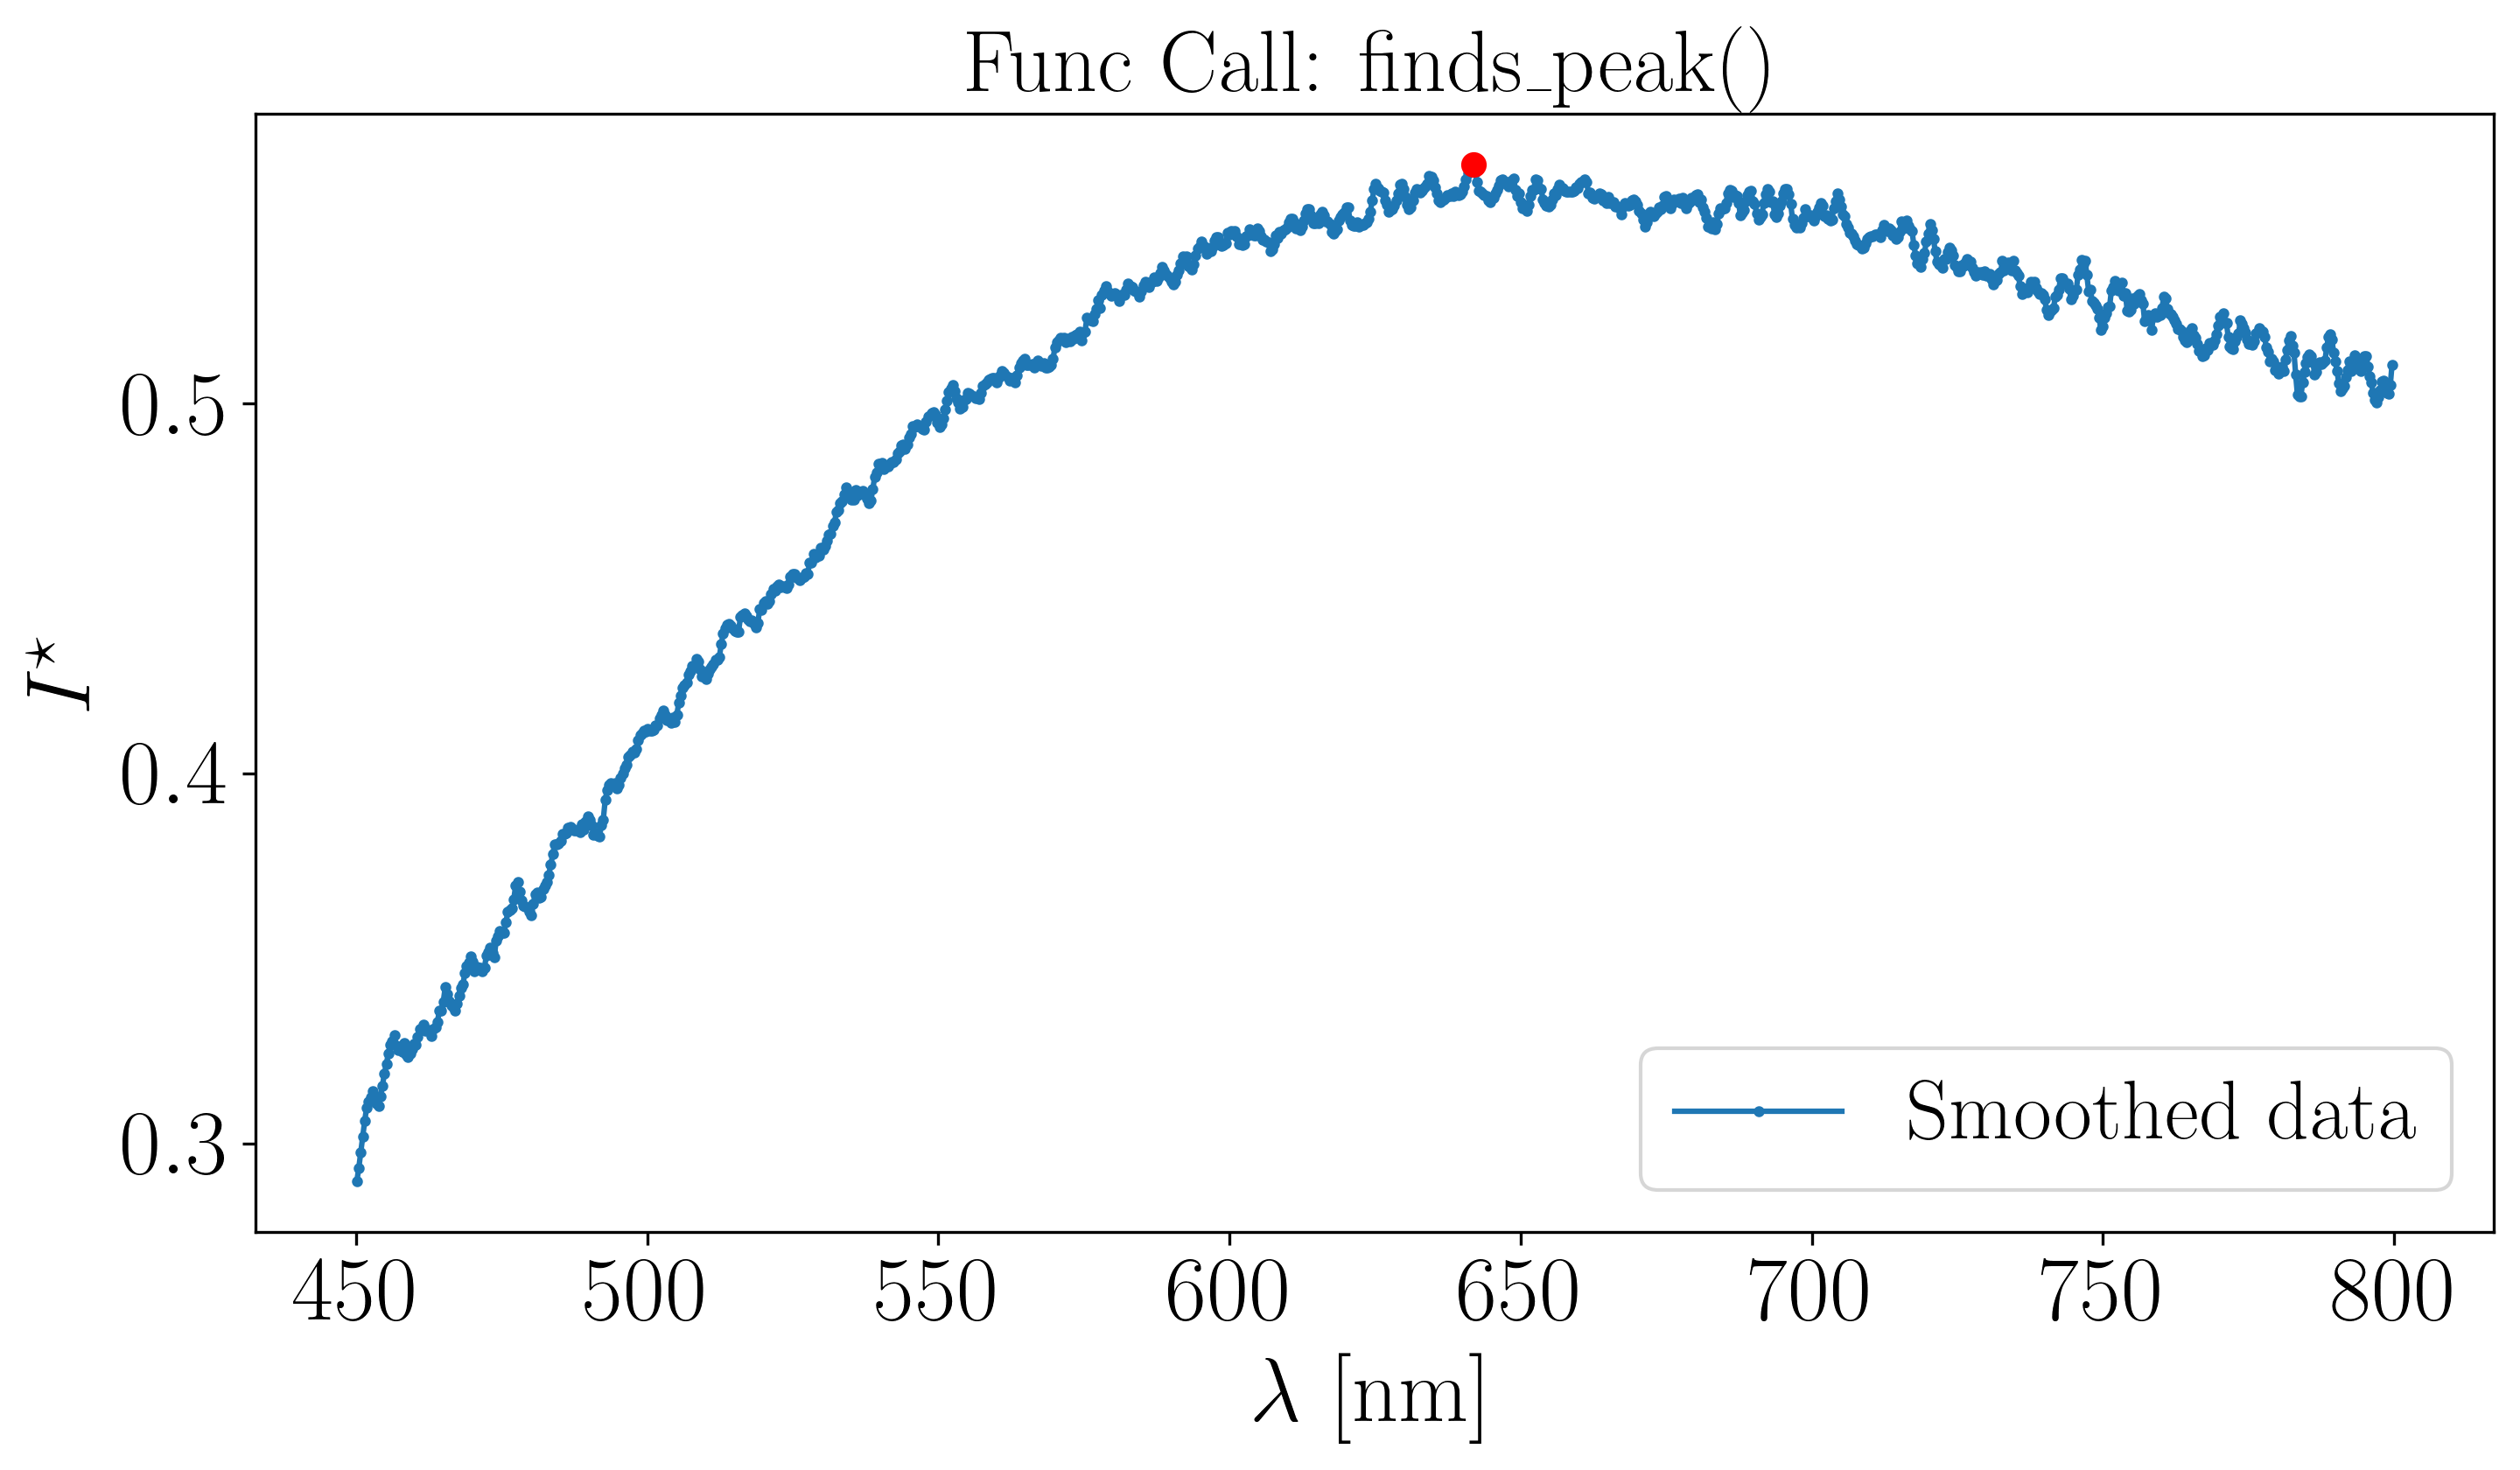

(array([], dtype=int64), array([587]))

In [4]:
from pathlib import Path
from optifik.io import load_spectrum
from optifik.analysis import plot_spectrum
from optifik.analysis import smooth_intensities
from optifik.analysis import finds_peak

# Define the path to the folder containing your .xy file
datafile_path = datafile_path = Path('../../data/basic/000018918.xy')

# Load wavelengths and intensities from the file
wavelengths, intensities = load_spectrum(datafile_path, 
                                         wavelength_min=450, 
                                         wavelength_max=800)

# Smoothing the intensity
intensities_smoothed = smooth_intensities(intensities)

# Peak detection function, min_peak_prominence and min_peak_distance can be adjusted.
finds_peak(wavelengths, intensities_smoothed, 
           min_peak_prominence=0.02, 
           min_peak_distance=10, 
           plot=True)

In the $[450, 800]$ nm spectral range shown above, only one maximum have been successfully detected, indicating that it corresponds to zero interference order. To apply the Scheludko renormalization method we use the the void intensity as in input in using the `thickness_from_scheludko` function from the `optifik.scheludko` module. Here an exemple of plot you can obtain. 

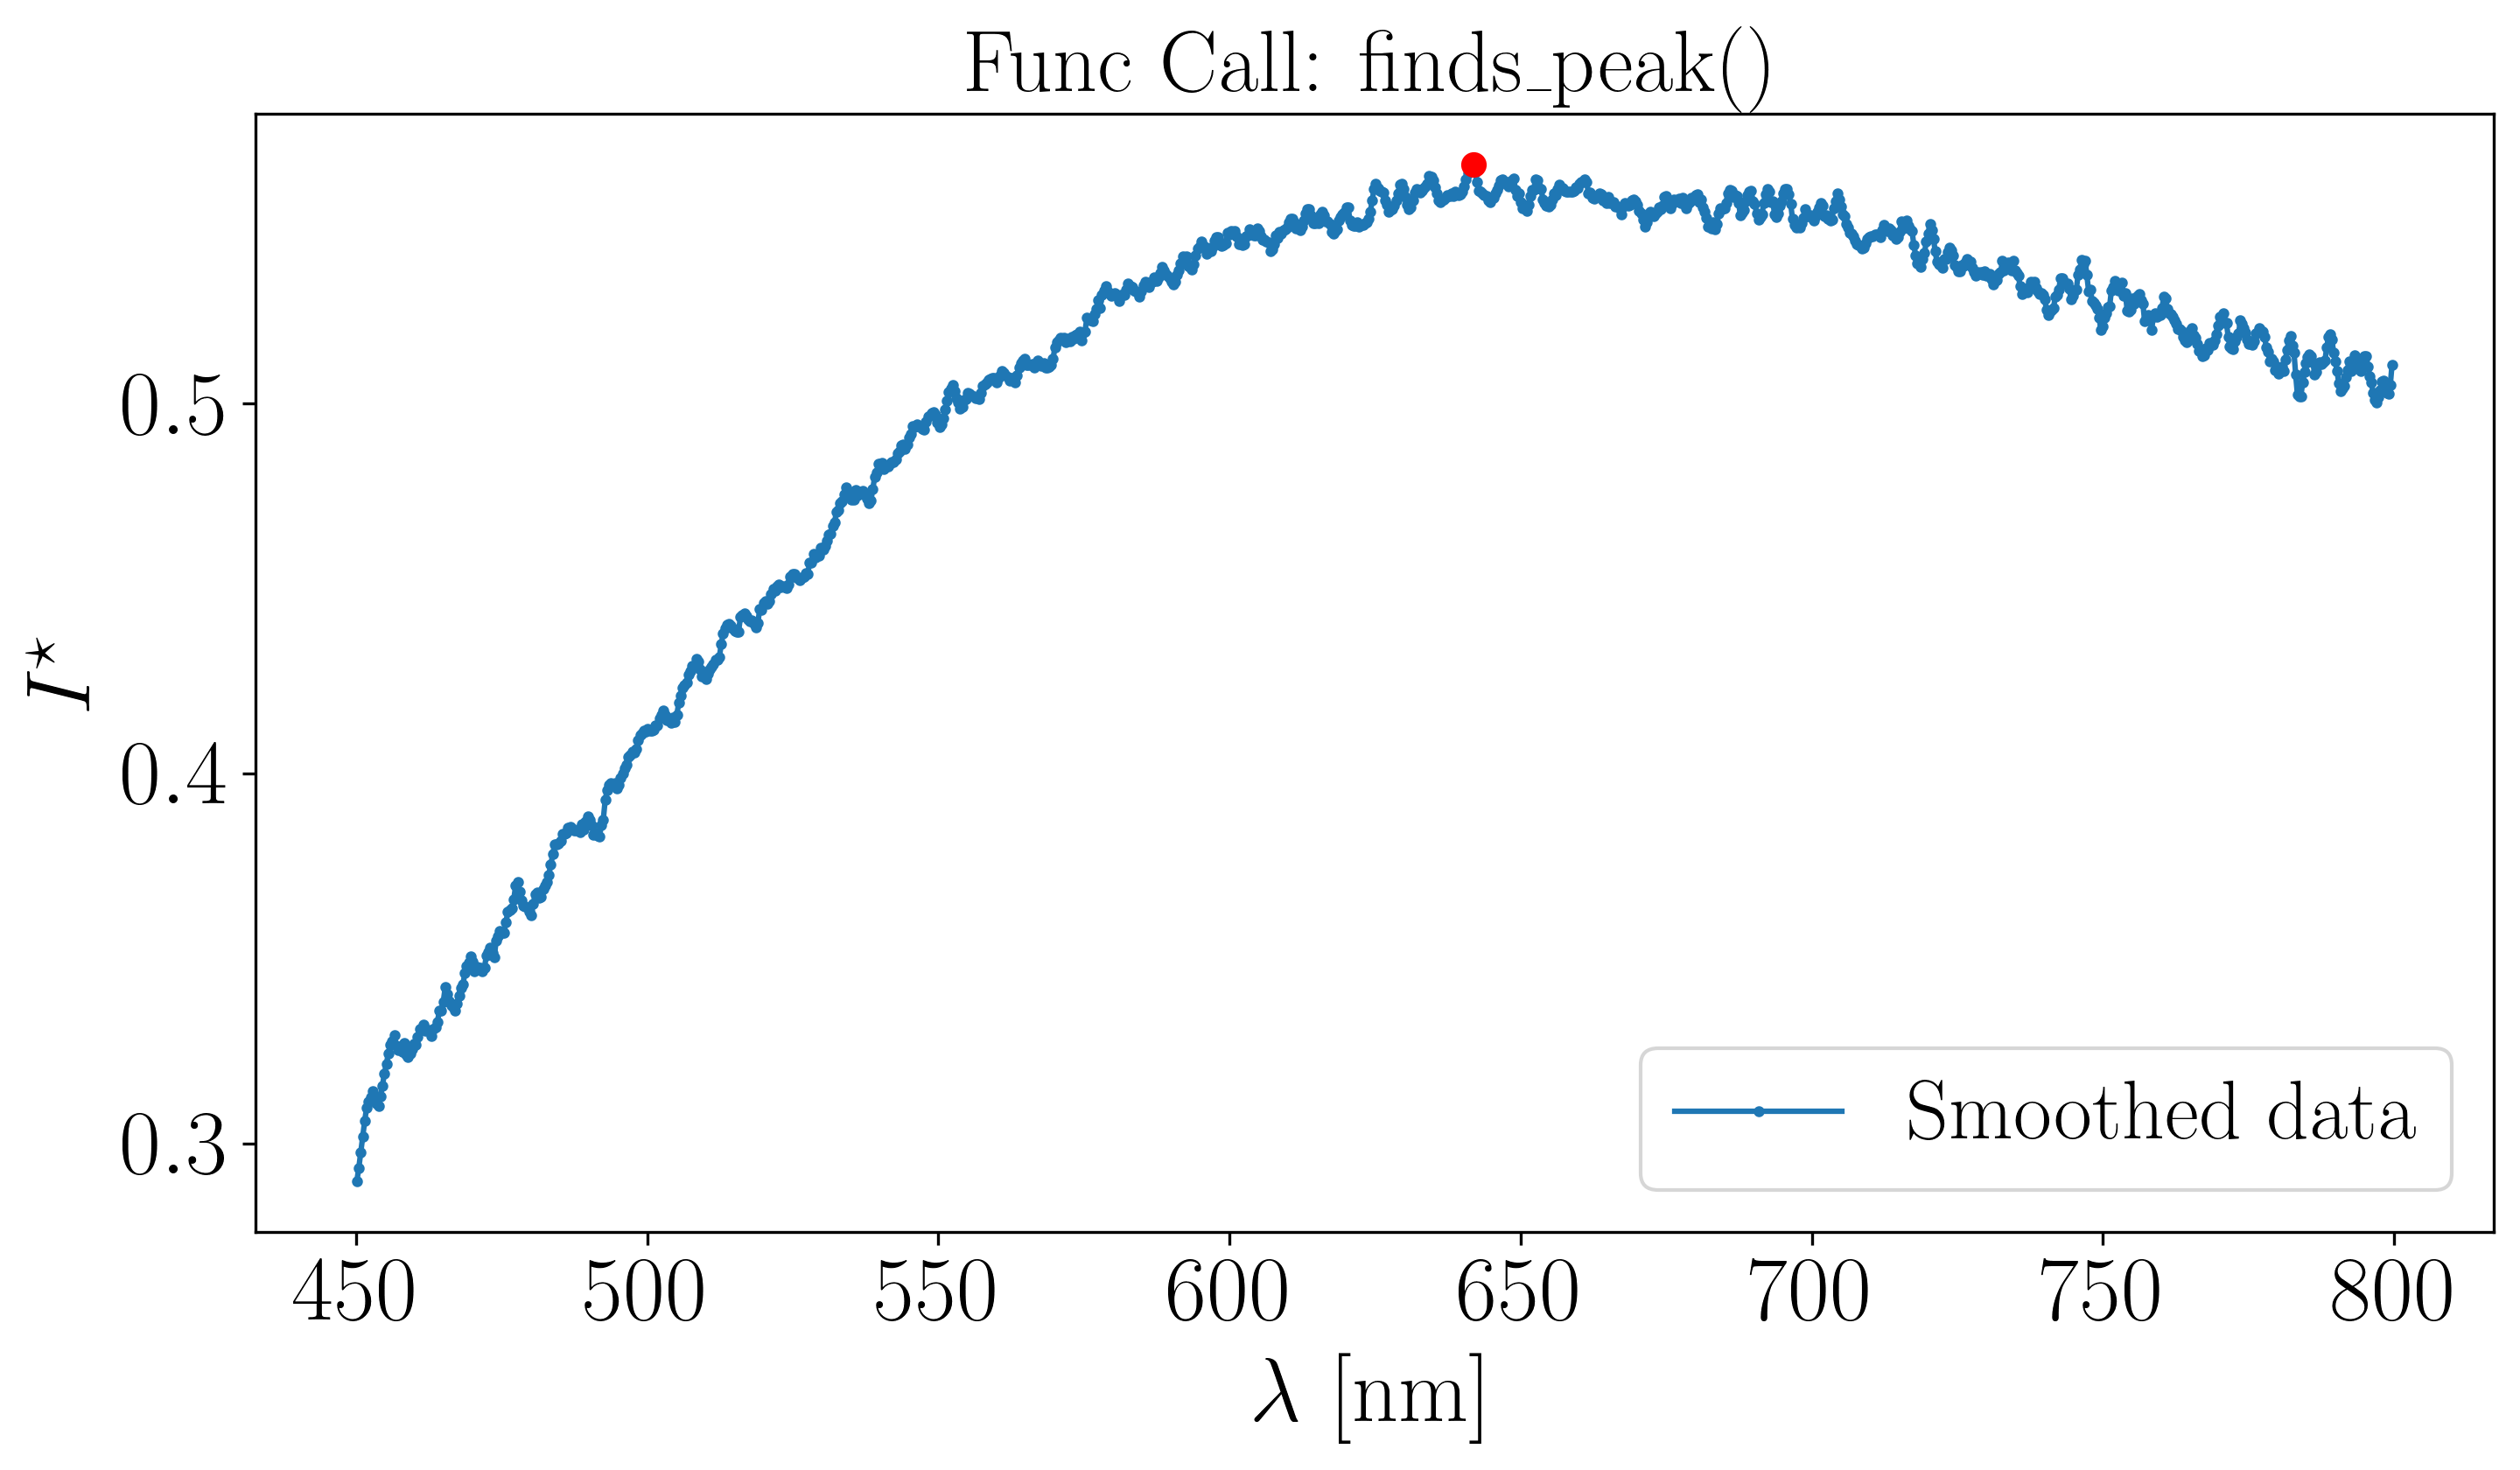

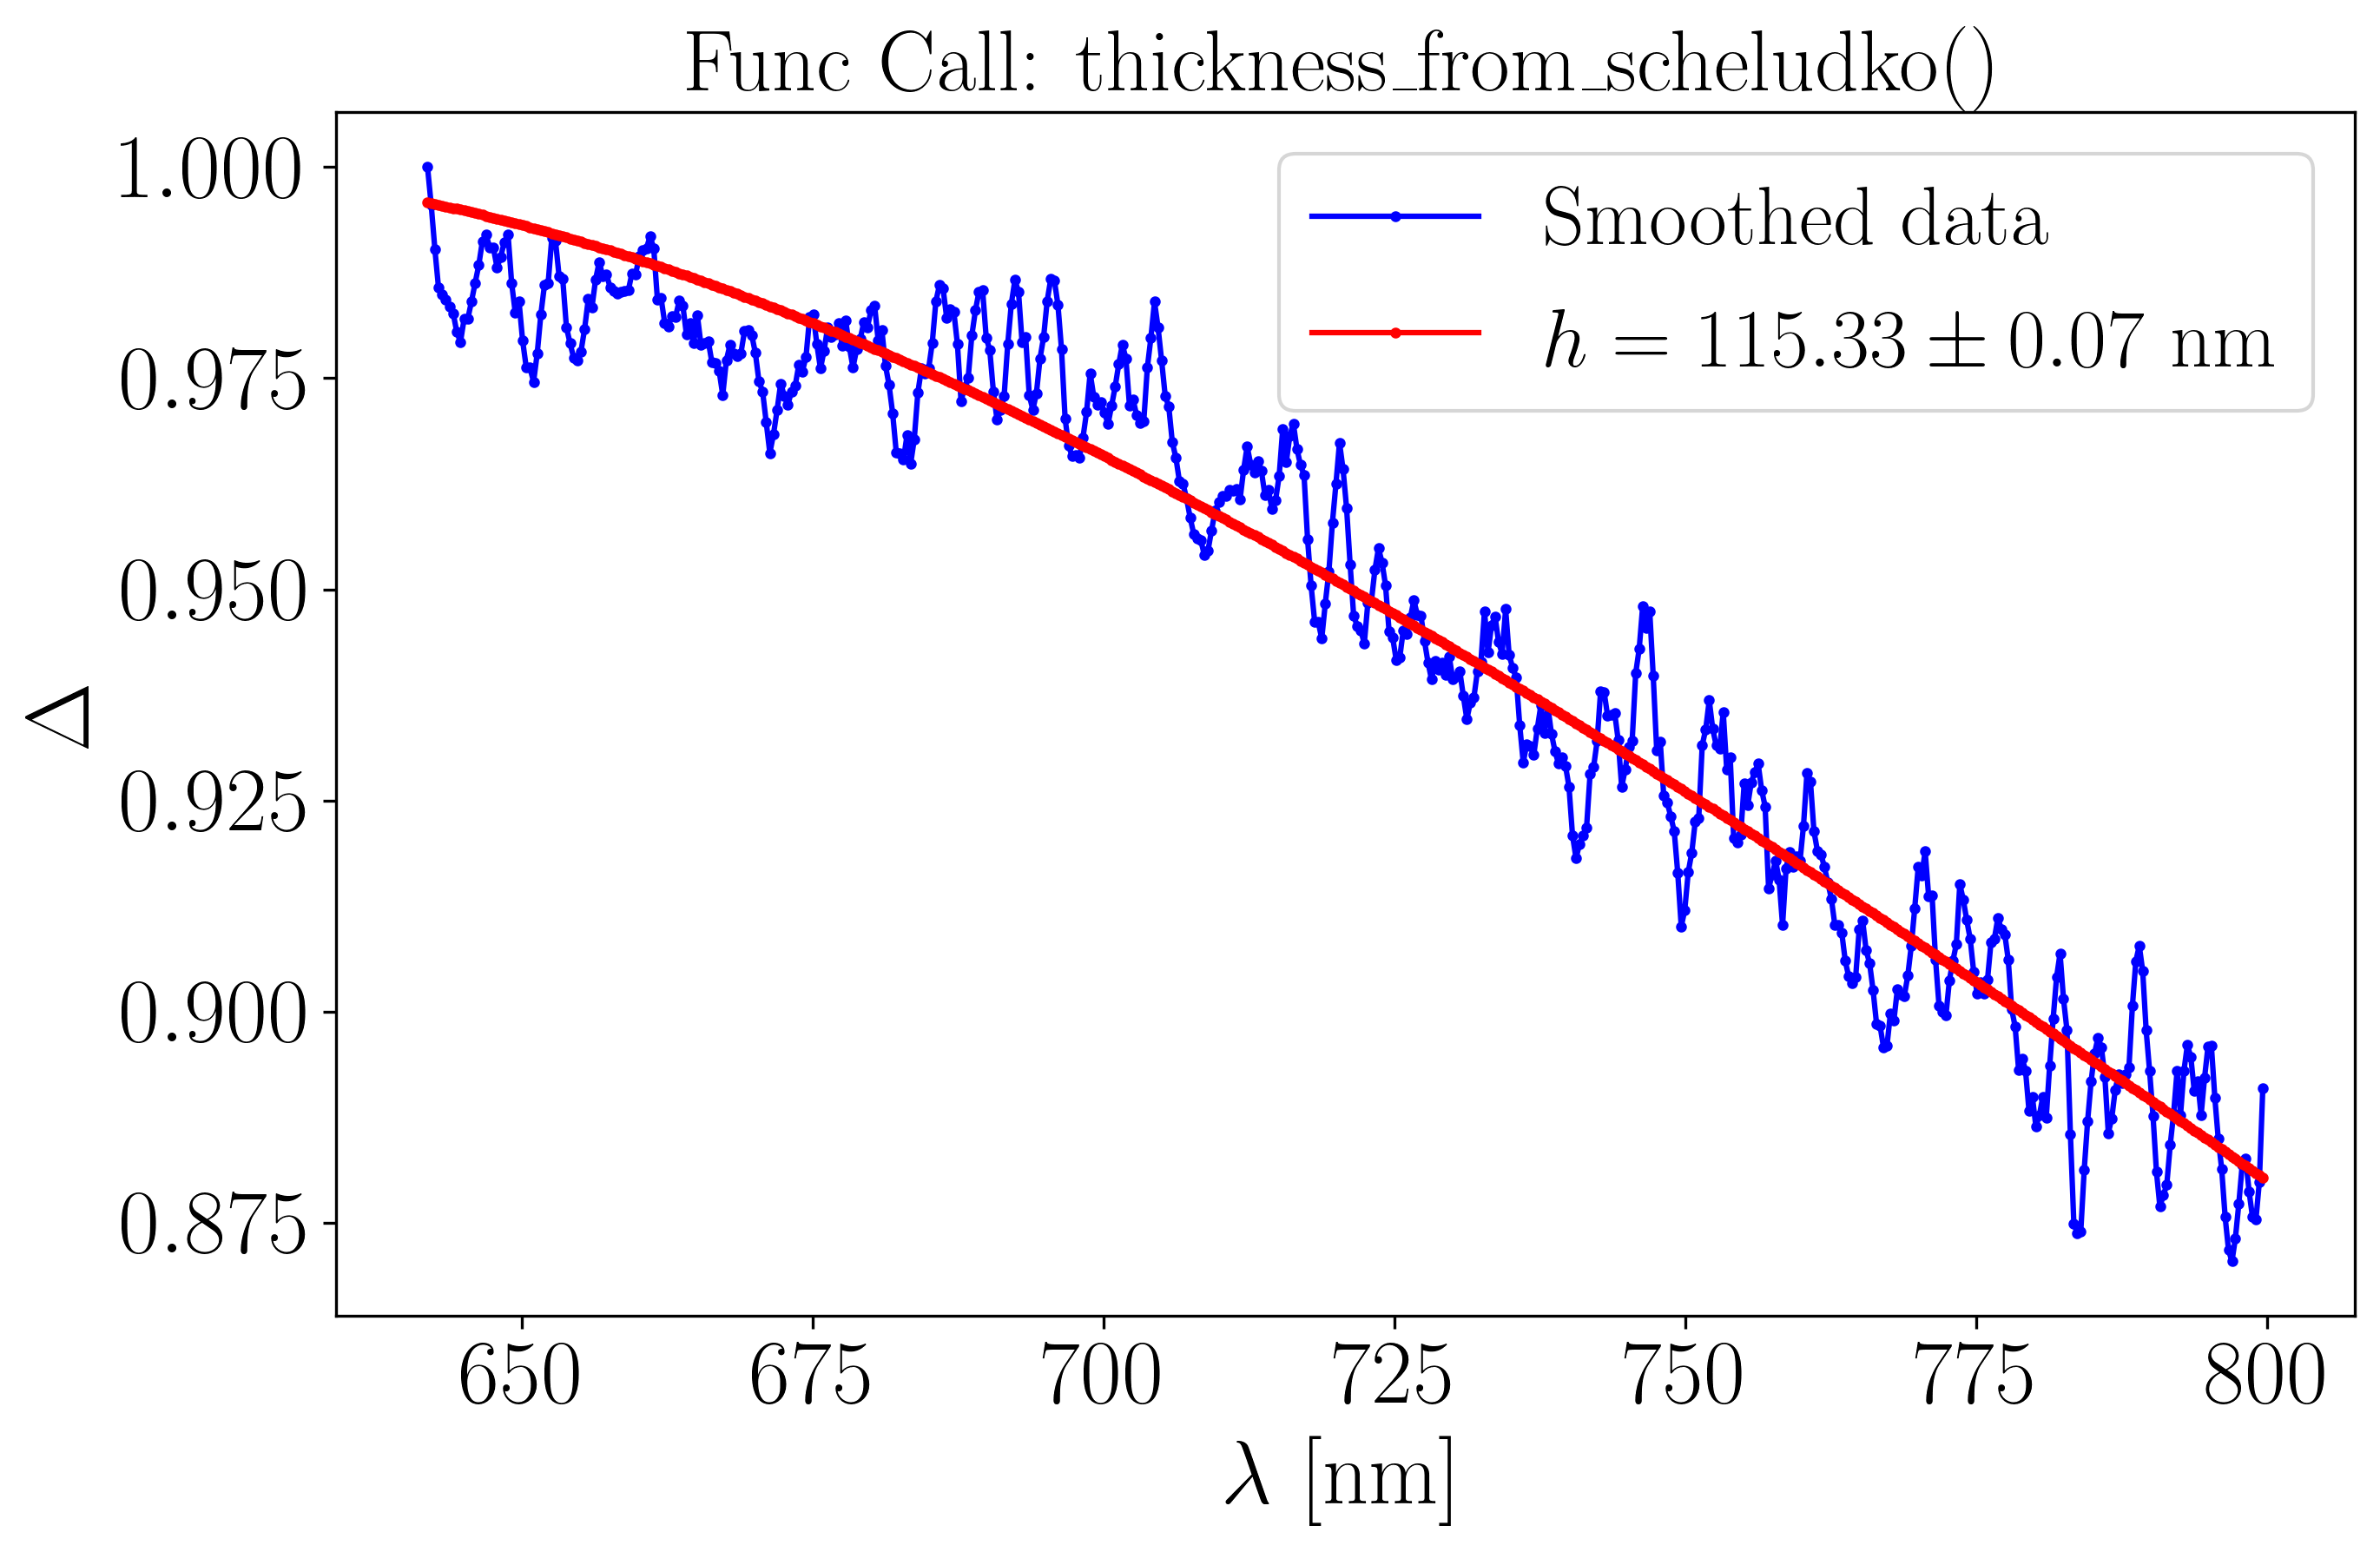

In [5]:
from optifik.scheludko import thickness_from_scheludko

# Define the path to the folder containing your .xy void file
Data_folder_void = Path('../../data/basic/void.xy')
# Load wavelengths and intensities from the void file
lambdas_void, intensities_void = load_spectrum(Data_folder_void, 
                                               wavelength_min=450, 
                                               wavelength_max=800)

# Refractive index calculated using Cauchy's law
refractive_index = 1.324188 + 3102.060378 / (wavelengths**2)
 
# Determine the film thickness by Sheludko renormalisation
result = thickness_from_scheludko(wavelengths, intensities_smoothed,
                                 refractive_index=refractive_index,
                                 wavelength_start=None,
                                 wavelength_stop=None,
                                 interference_order=0,
                                 intensities_void=intensities_void,
                                 plot=True)

The second plot fit the data with $h$ as an initial guess. The output shows the film thickness along with its associated uncertainty.

In [6]:
print(result)

    interference_order: 0
             thickness: np.float64(115.32819887136147)
 thickness_uncertainty: np.float64(0.07081241796526806)


- You can provide a refractive index constant $n(\lambda) = n$ as an `refractive_index` input. Note that in this example a wavelength-dependent model such as Cauchy's law $\left(n(\lambda) = A + \frac{B}{\lambda^2}\right)$ is used.
- It is **not** mandatory to give `wavelength_start` and `wavelength_stop`.
- It is **mandatory** to give the `intensities_void` parameter in the same format as the `intensities_smoothed` parameter.